# EDA Analysis

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import pandas as pd
import numpy as np


data_path = Path.cwd().parent / "data" / "processed" / "api_data_cleaned_merged.csv"
df = pd.read_csv(str(data_path),index_col=0)

In [142]:
df.index = df.Date
df = df.drop(columns=['Date'])

In [143]:
df

,CL=F,UUP,GLD,^VIX,^OVX,SHY,IEF,TIP
Date,,,,,,,,
2020-08-20,42.580002,22.342087,183.500000,22.719999,32.830002,77.537857,108.536964,104.350189
2020-08-21,42.340000,22.449070,182.029999,22.540001,33.680000,77.528900,108.617058,104.707382
2020-08-24,42.619999,22.484734,181.000000,22.370001,32.250000,77.519936,108.465836,104.915039
2020-08-25,43.349998,22.404493,181.220001,22.030001,33.029999,77.528900,108.207924,104.881805
2020-08-26,43.389999,22.377748,183.360001,23.270000,33.790001,77.528900,108.163422,105.089485
...,...,...,...,...,...,...,...,...
2025-08-14,63.959999,27.430000,307.250000,14.830000,35.959999,82.699997,95.419998,110.250000
2025-08-15,62.799999,27.340000,307.429993,15.090000,37.220001,82.669998,95.230003,110.040001
2025-08-18,63.419998,27.410000,306.950012,14.990000,32.150002,82.669998,95.139999,109.919998


## Calculating returns/log-returns to look at time-series returns/correlations etc.,

In [144]:
returns_df = df.pct_change().dropna()
log_returns_df = np.log(df / df.shift(1)).dropna()

In [145]:
returns_df*100

,CL=F,UUP,GLD,^VIX,^OVX,SHY,IEF,TIP
Date,,,,,,,,
2020-08-21,-0.563649,0.478842,-0.801091,-0.792246,2.589091,-0.011552,0.073794,0.342302
2020-08-24,0.661310,0.158865,-0.565840,-0.754215,-4.245844,-0.011563,-0.139225,0.198321
2020-08-25,1.712810,-0.356865,0.121548,-1.519893,2.418601,0.011564,-0.237781,-0.031677
2020-08-26,0.092274,-0.119373,1.180885,5.628687,2.300945,0.000000,-0.041127,0.198013
2020-08-27,-0.806634,0.119515,-1.156193,5.156849,-0.147971,-0.011563,-0.353575,-0.395215
...,...,...,...,...,...,...,...,...
2025-08-14,2.090978,0.365900,-0.633871,2.346447,6.327615,-0.108714,-0.323833,-0.298428
2025-08-15,-1.813633,-0.328108,0.058582,1.753205,3.503899,-0.036274,-0.199114,-0.190475
2025-08-18,0.987259,0.256034,-0.156127,-0.662693,-13.621707,0.000000,-0.094512,-0.109054


## Plain Numerical Analysis of WTI futures

In [146]:
summary_df = returns_df.describe().T[["mean","50%","std","min","max"]]*100
summary_df

,mean,50%,std,min,max
CL=F,0.058134,0.202819,2.333575,-13.062888,8.481426
UUP,0.017435,0.036007,0.453314,-2.285718,1.615675
GLD,0.045663,0.051319,0.949348,-4.427098,3.699125
^VIX,0.278666,-0.754215,8.143388,-35.753874,74.039074
^OVX,0.207430,-0.442475,6.671684,-26.745971,88.904856
SHY,0.005262,0.000000,0.121347,-0.508790,0.997404
IEF,-0.009008,-0.017332,0.485233,-1.777016,2.252529
TIP,0.005122,0.015632,0.396033,-1.683897,1.767056


The "average" daily return for the WTI futures index is about 0.05% daily return with an "average" volatility of 2.3%. We can calculate an approximate sharpe using this - but we know this will be lower than any equity index due to high volatility of the WTI futures

In [147]:
summary_df = summary_df.reset_index()
mean_daily_ret = summary_df.iloc[0]['mean']
annualized_avg_ret = (np.pow(1+((mean_daily_ret)/100),252)-1)*100
annualized_vol = summary_df.iloc[0]['std']*np.sqrt(252)
sharpe = annualized_avg_ret/annualized_vol

In [148]:
print(f'Return annualized %: {annualized_avg_ret}')
print(f'Vol annualized %: {annualized_vol}')
print(f'Sharpe ratio annualized: {sharpe}')

Return annualized %: 15.772222659336244
Vol annualized %: 37.0443478074649
Sharpe ratio annualized: 0.4257659695160821


If we remove the period of the pandemic - Mar 2020 to Dec 2021 - which is the period of the most severe drawdowns (and potentially contributing to the fat left tail in the data) - we might observe better risk-adjusted returns. Instead I might remove extreme outliers (occuring between 2020 and early 2022 and observe results)

In [149]:
src_path = Path.cwd().parent / "src"
sys.path.append(str(src_path))

from outlier_analysis import *

 I'm using higher than normal for Z-score outlier analysis to specifically target extremes only in the pandemic (although I might not exclude this for actual prediction because this is an actual shock and not particularly random - especially if we want the risk regime switch to be "stress-aware")

In [150]:
returns_df['WTIoutliers'] = detect_outliers_zscore(returns_df['CL=F'], threshold=3.5)

In [151]:
returns_df[returns_df['WTIoutliers']]

,CL=F,UUP,GLD,^VIX,^OVX,SHY,IEF,TIP,WTIoutliers
Date,,,,,,,,,
2020-11-09,0.084814,0.006428,-0.044271,0.035800,-0.063677,-0.000347,-0.007386,-0.002880,True
2021-11-26,-0.130629,-0.007701,-0.001616,0.540366,0.889049,0.001985,0.012906,0.004953,True
2022-03-09,-0.121261,-0.009811,-0.029711,-0.076288,-0.033896,-0.000593,-0.006172,-0.009910,True
2022-03-17,0.083544,-0.002283,0.004889,-0.037495,0.142039,-0.000358,-0.001927,0.013636,True
2022-07-05,-0.082357,0.014260,-0.021210,0.031461,0.064980,-0.000121,0.003681,-0.002779,True
2025-06-23,-0.085680,-0.004015,0.003063,-0.038312,-0.170404,0.001333,0.003488,0.000823,True


In [152]:
returns_df_exo = returns_df[~returns_df['WTIoutliers']]
returns_df_exo

,CL=F,UUP,GLD,^VIX,^OVX,SHY,IEF,TIP,WTIoutliers
Date,,,,,,,,,
2020-08-21,-0.005636,0.004788,-0.008011,-0.007922,0.025891,-0.000116,0.000738,0.003423,False
2020-08-24,0.006613,0.001589,-0.005658,-0.007542,-0.042458,-0.000116,-0.001392,0.001983,False
2020-08-25,0.017128,-0.003569,0.001215,-0.015199,0.024186,0.000116,-0.002378,-0.000317,False
2020-08-26,0.000923,-0.001194,0.011809,0.056287,0.023009,0.000000,-0.000411,0.001980,False
2020-08-27,-0.008066,0.001195,-0.011562,0.051568,-0.001480,-0.000116,-0.003536,-0.003952,False
...,...,...,...,...,...,...,...,...,...
2025-08-14,0.020910,0.003659,-0.006339,0.023464,0.063276,-0.001087,-0.003238,-0.002984,False
2025-08-15,-0.018136,-0.003281,0.000586,0.017532,0.035039,-0.000363,-0.001991,-0.001905,False
2025-08-18,0.009873,0.002560,-0.001561,-0.006627,-0.136217,0.000000,-0.000945,-0.001091,False


## Plotting the distribution of the series and different variables

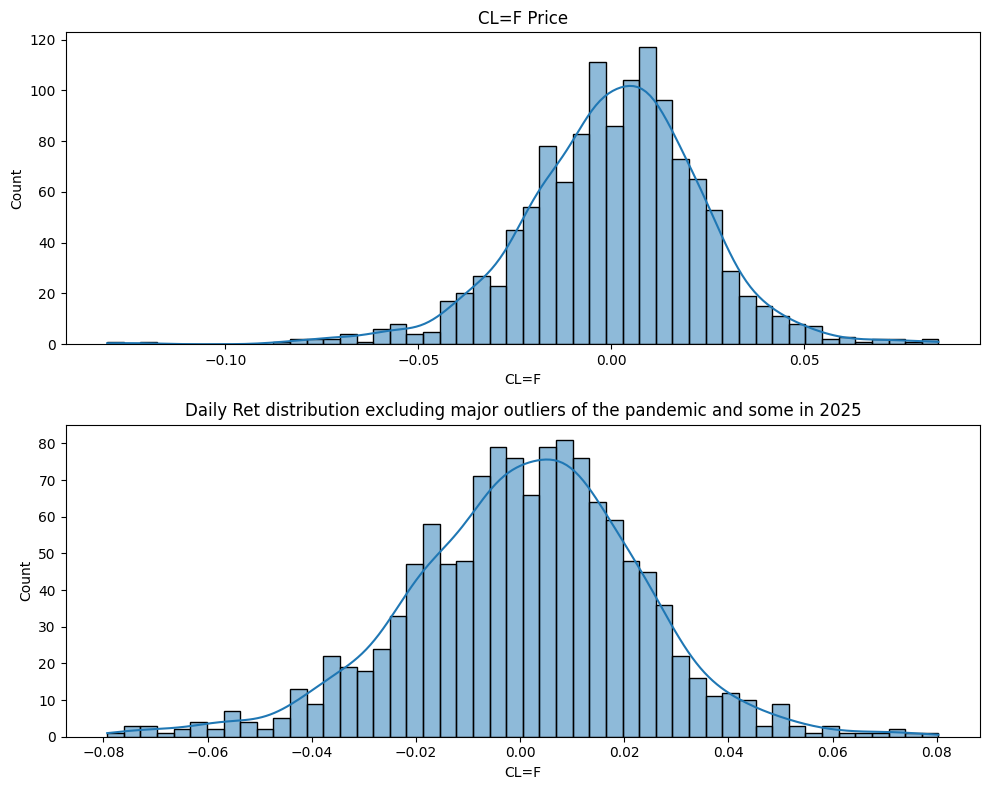

In [153]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(returns_df['CL=F'], bins=50, kde=True,ax=axes[0])
axes[0].set_title('CL=F Price')
plt.title('Daily Ret distribution including the period of the pandemic')

sns.histplot(returns_df_exo['CL=F'], bins=50, kde=True,ax=axes[1])
axes[1].set_title('CL=F Price')
plt.title('Daily Ret distribution excluding major outliers of the pandemic and some in 2025')

plt.tight_layout()
plt.show()

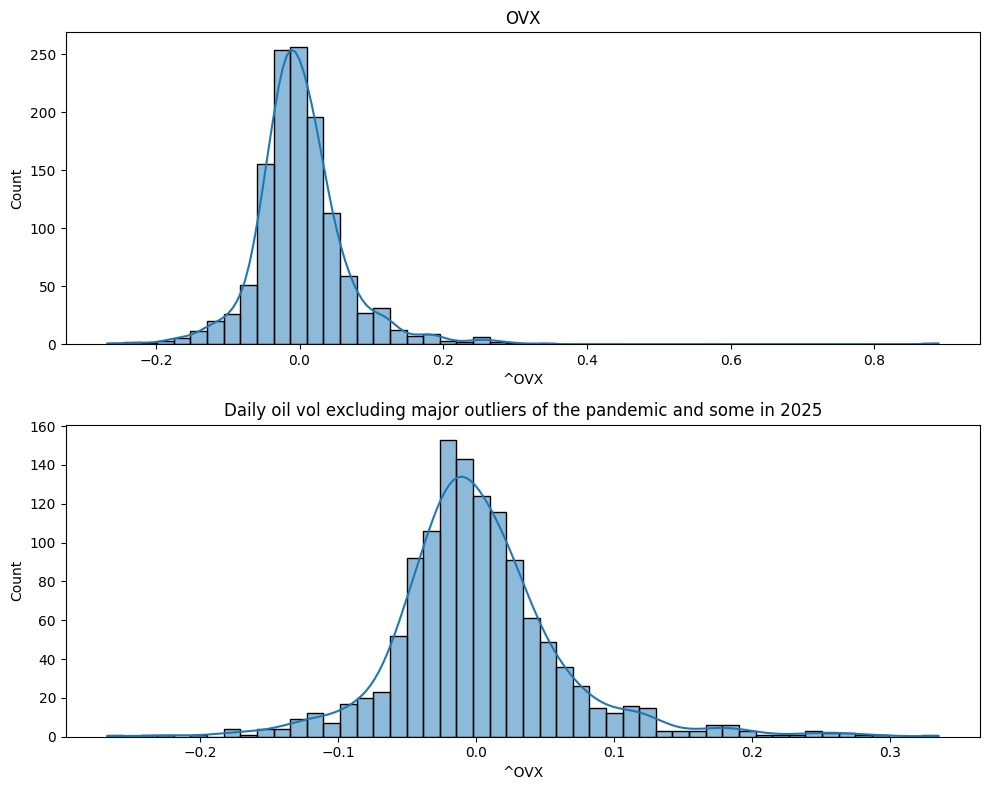

In [154]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(returns_df['^OVX'], bins=50, kde=True,ax=axes[0])
axes[0].set_title('OVX')
plt.title('Daily oil vol including the period of the pandemic')

sns.histplot(returns_df_exo['^OVX'], bins=50, kde=True,ax=axes[1])
axes[1].set_title('OVX')
plt.title('Daily oil vol excluding major outliers of the pandemic and some in 2025')

plt.tight_layout()
plt.show()

## Plotting distributions of other macro-indicators/indices over this period

These plots need not necessarily be used for anything other than to comment on widely known characteristics of the broader asset class.

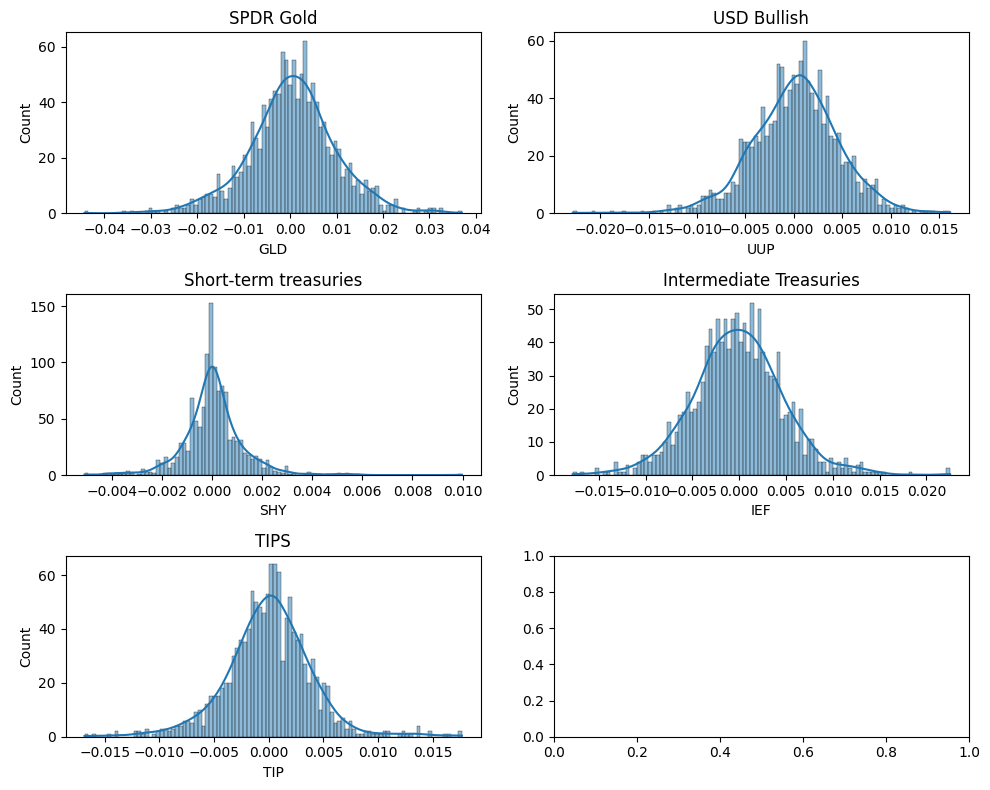

In [155]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

sns.histplot(returns_df['GLD'], bins=100, kde=True,ax=axes[0,0])
axes[0,0].set_title('SPDR Gold')

sns.histplot(returns_df['UUP'], bins=100, kde=True,ax=axes[0,1])
axes[0,1].set_title('USD Bullish')


sns.histplot(returns_df['SHY'], bins=100, kde=True,ax=axes[1,0])
axes[1,0].set_title('Short-term treasuries')


sns.histplot(returns_df['IEF'], bins=100, kde=True,ax=axes[1,1])
axes[1,1].set_title('Intermediate Treasuries')


sns.histplot(returns_df['TIP'], bins=100, kde=True,ax=axes[2,0])
axes[2,0].set_title('TIPS')



plt.tight_layout()
plt.show()


Below, I pairplot the OVX index against the two main macroeconomic indicators - the USD performance across five years, and Gold shares returns. It is evident (and expected that these variables will not be captured by a linear relationship). Gold and USD have an approximately inverse (slightly more linear) relationship which is also to be expected.

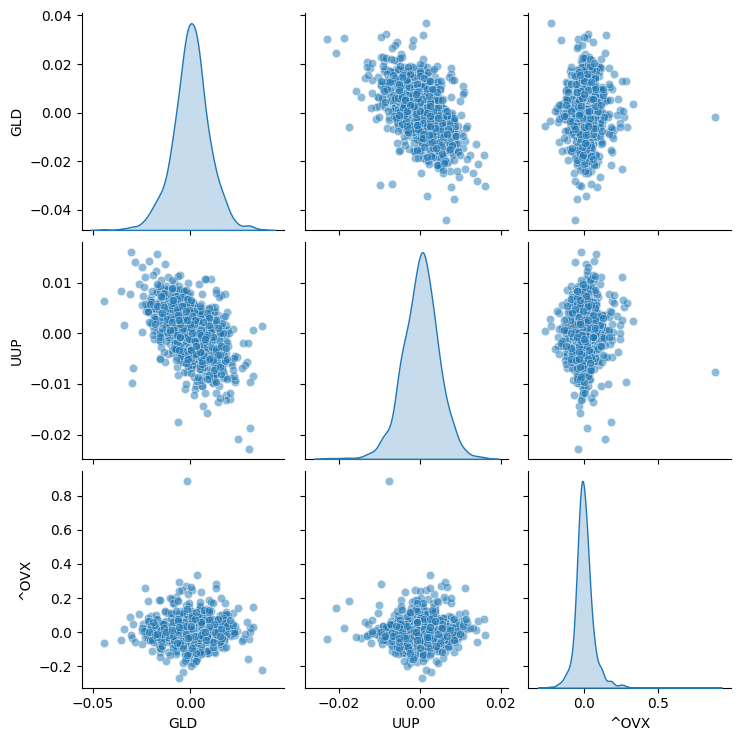

In [156]:
sns.pairplot(
    returns_df[['GLD','UUP','^OVX']],
    kind='scatter',
    diag_kind='kde',  # density plots on diagonal
    plot_kws={'alpha':0.5}
)
plt.show()

This can be considered another way to check daily price movements

In [11]:
pos_count = (returns_df['CL=F'] > 0).sum()
neg_count = (returns_df['CL=F'] < 0).sum()

# Put into a small dataframe
counts = pd.DataFrame({
    'Category': ['Positive Changes', 'Negative Changes'],
    'Count': [pos_count, neg_count]
})

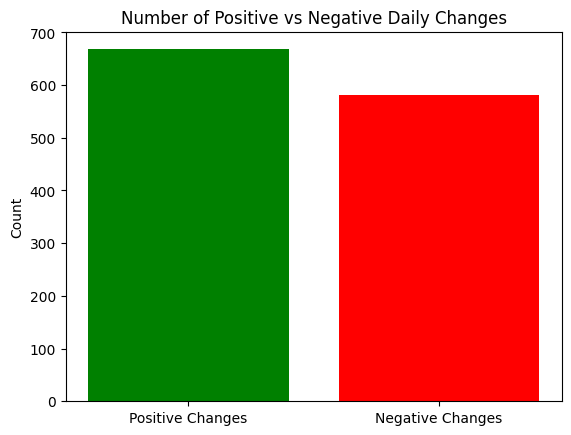

In [12]:
plt.bar(counts['Category'], counts['Count'], color=['green', 'red'])
plt.title("Number of Positive vs Negative Daily Changes")
plt.ylabel("Count")
plt.show()

## Volatility indices and their relationship

It can be useful to observe, along with the movement of WTI with other indicators - the movement of VIX with OVX to see if there is a trend that can add to our risk-regime analysis

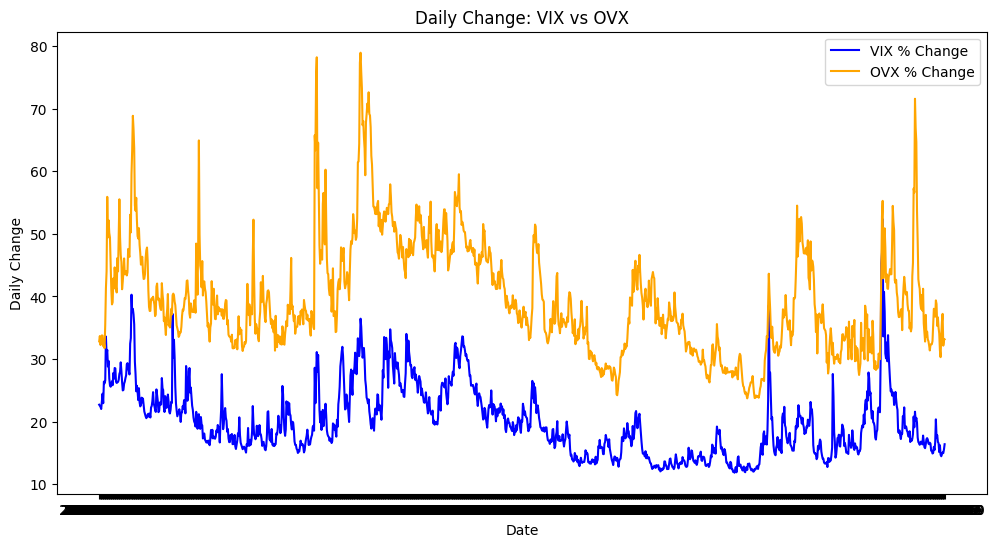

In [114]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['^VIX'], label='VIX % Change', color='blue')
plt.plot(df.index, df['^OVX'], label='OVX % Change', color='orange')
plt.title('Daily Change: VIX vs OVX')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.legend()
plt.show()

From the plot above, we don't necessarily have information about how closely correlated they are, but it can be said that they *might* follow the same trend with a different magnitude in change

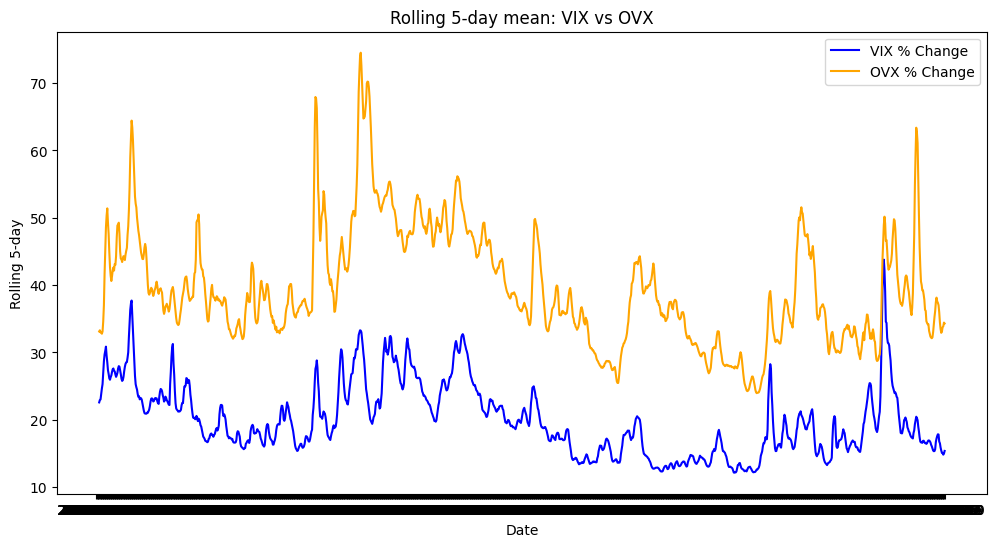

In [118]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['^VIX'].rolling(5).mean(), label='VIX % Change', color='blue')
plt.plot(df.index, df['^OVX'].rolling(5).mean(), label='OVX % Change', color='orange')
plt.title('Rolling 5-day mean: VIX vs OVX')
plt.xlabel('Date')
plt.ylabel('Rolling 5-day')
plt.legend()
plt.show()

Once we smooth the series a bit, it can be observed that there are brief periods where the VIX drops and the OVX spikes, or the OVX spikes by a great margin and the VIX does not respond in any meaningful way - these can apply lower correlation

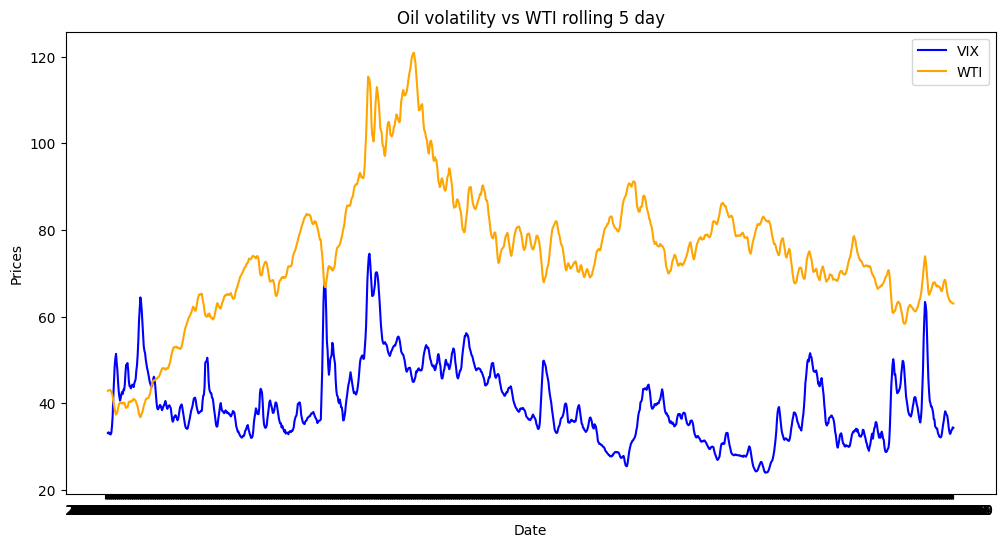

In [126]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['^OVX'].rolling(5).mean(), label='VIX', color='blue')
plt.plot(df.index, df['CL=F'].rolling(5).mean(), label='WTI', color='orange')
plt.title('Oil volatility vs WTI rolling 5 day')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

Interestingly, OVX/WTI are not perfectly correlated either.

## Scatter plots of the WTI index against all chosen indicators

Again there is no straight-forward linear relationship immediately evident from the plots

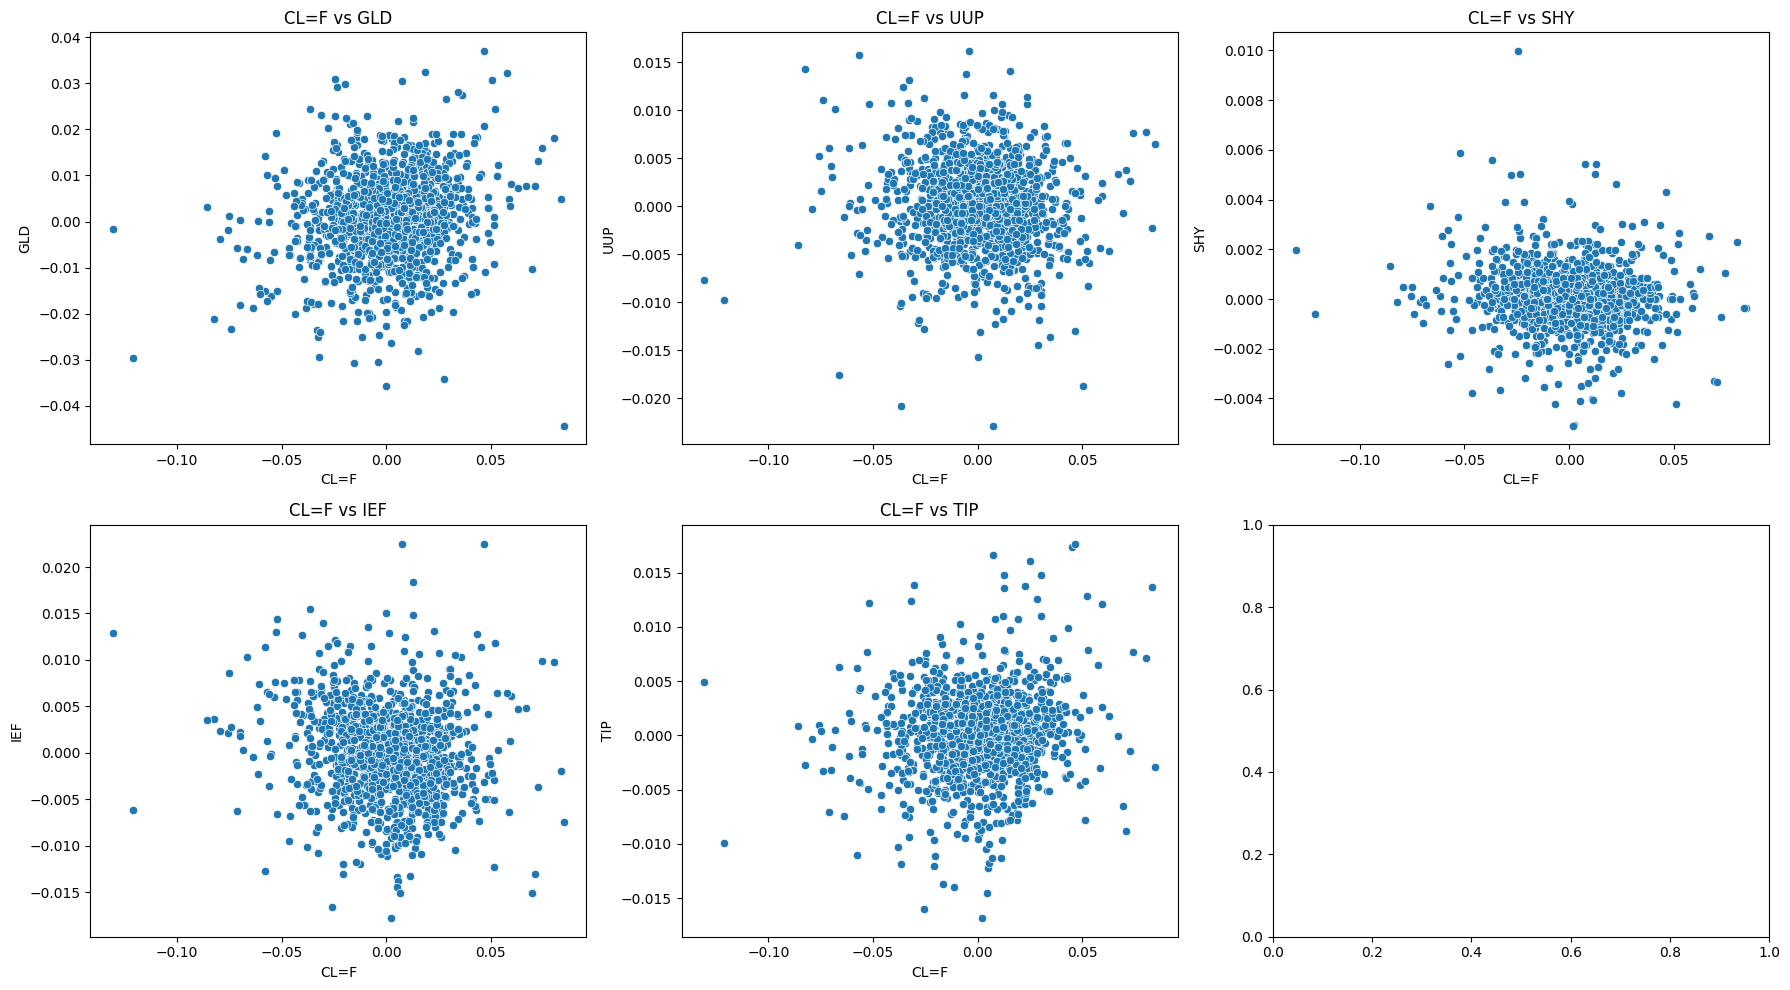

In [127]:
cols = ['CL=F','GLD','UUP','SHY','IEF','TIP']
subset = returns_df[cols]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols[1:]):  # skip CL=F for x-axis
    sns.scatterplot(x=subset['CL=F'], y=subset[col], ax=axes[i])
    axes[i].set_title(f"CL=F vs {col}")

plt.tight_layout()
plt.show()

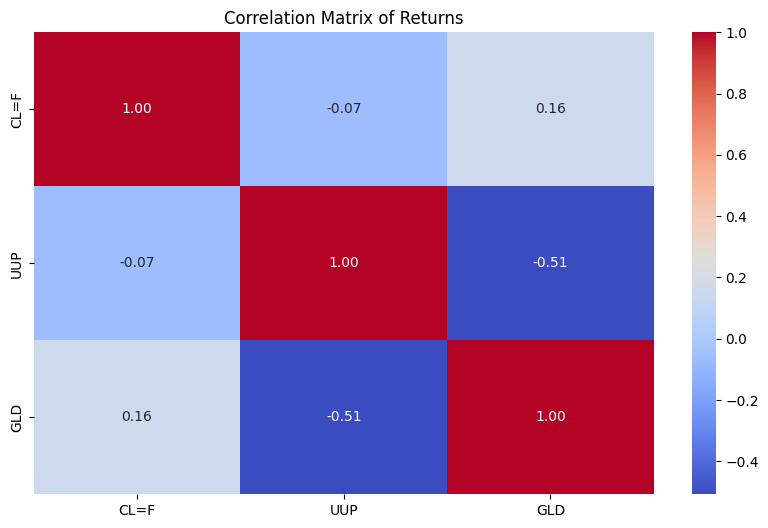

In [130]:
plt.figure(figsize=(10,6))
sns.heatmap(returns_df[['CL=F','UUP','GLD']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Returns")
plt.show()

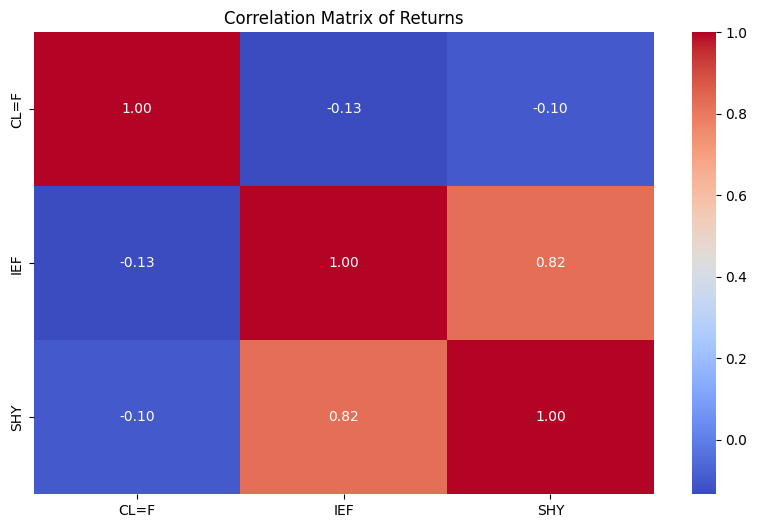

In [131]:
plt.figure(figsize=(10,6))
sns.heatmap(returns_df[['CL=F','IEF','SHY']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Returns")
plt.show()

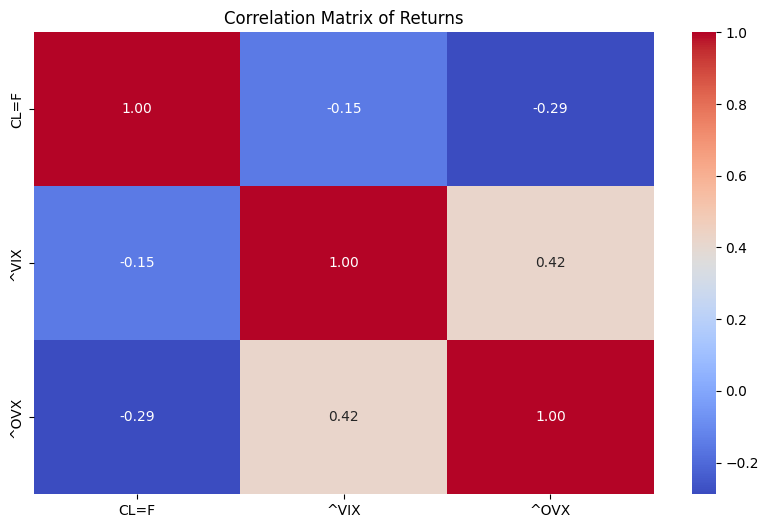

In [132]:
plt.figure(figsize=(10,6))
sns.heatmap(returns_df[['CL=F','^VIX','^OVX']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Returns")
plt.show()

The heatmaps confirm our suspicions from before, the there is a low/inconsistent correlation of oil futures prices with other macroeconomic indicators - the most significant relationship is with Gold, but even has a very low coefficient of correl. There is however, a moderately meaningful relationship between the equity volalitiy and oil volatility indices.

# Top 3 Insights:

1. The WTI index does not appear to have a linear relationship with any of the chosen macro indicators, /n 
and it's distributed has heavier fat tails (primarily due to the pandemic outliers in oil future's price)

2. The equity volatility index and the oil volatility index seem to have a meaningful causal relationship

3. The threshold chosen to eliminate outliers is intentionally high - as it might not be wise to remove extreme pandemic data points for modeling risk regimes